In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [27]:
file_train = Path(r"C:\devel\Loan_default_prediction\data\raw\application_train.csv").resolve()
df = pd.read_csv(file_train)
df.columns = [column.lower() for column in df.columns]
print("The total shape of the dataframe: {}".format(df.shape))
df.head()

The total shape of the dataframe: (307511, 122)


,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
def describe_with_nans(df):
    # Basic describe
    desc = df.describe(include='all').transpose()

    # Count of NaN values
    desc['nan_count'] = df.isnull().sum()

    # Percentage of NaN values
    desc['nan_percentage'] = (df.isnull().sum() / len(df)) * 100
    
    return desc

In [26]:
describe_with_nans(df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nan_count,nan_percentage
sk_id_curr,307511.0,NaN,NaN,NaN,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0,0,0.000000
target,307511.0,NaN,NaN,NaN,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0,0,0.000000
name_contract_type,307511,2,Cash loans,278232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
code_gender,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
flag_own_car,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
amt_req_credit_bureau_day,265992.0,NaN,NaN,NaN,0.007,0.110757,0.0,0.0,0.0,0.0,9.0,41519,13.501631
amt_req_credit_bureau_week,265992.0,NaN,NaN,NaN,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0,41519,13.501631
amt_req_credit_bureau_mon,265992.0,NaN,NaN,NaN,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0,41519,13.501631
amt_req_credit_bureau_qrt,265992.0,NaN,NaN,NaN,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0,41519,13.501631


In [28]:
df['name_contract_type'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: name_contract_type, dtype: int64

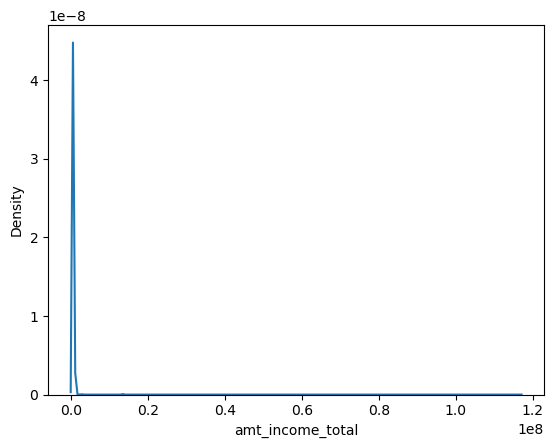

In [29]:
sns.kdeplot(x = 'amt_income_total', data = df)
plt.show()

In [30]:
df[df.target == 1].shape

(24825, 122)

In [32]:
defaulted_df = df[df.target == 1]
non_defaulted_df = df[df.target == 0]

In [33]:
defaulted_df.shape

(24825, 122)

In [34]:
non_defaulted_df.shape

(282686, 122)

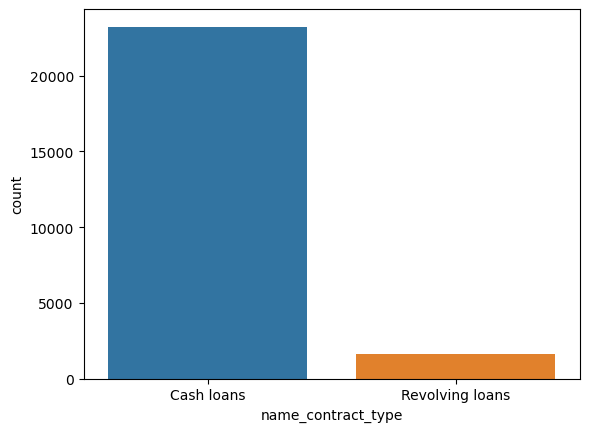

In [35]:
sns.countplot(data = defaulted_df, x = 'name_contract_type')
plt.show()